In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
df=pd.read_csv('global-data-on-sustainable-energy.csv')
df=df.rename(columns={'Value_co2_emissions_kt_by_country':'CO2'})

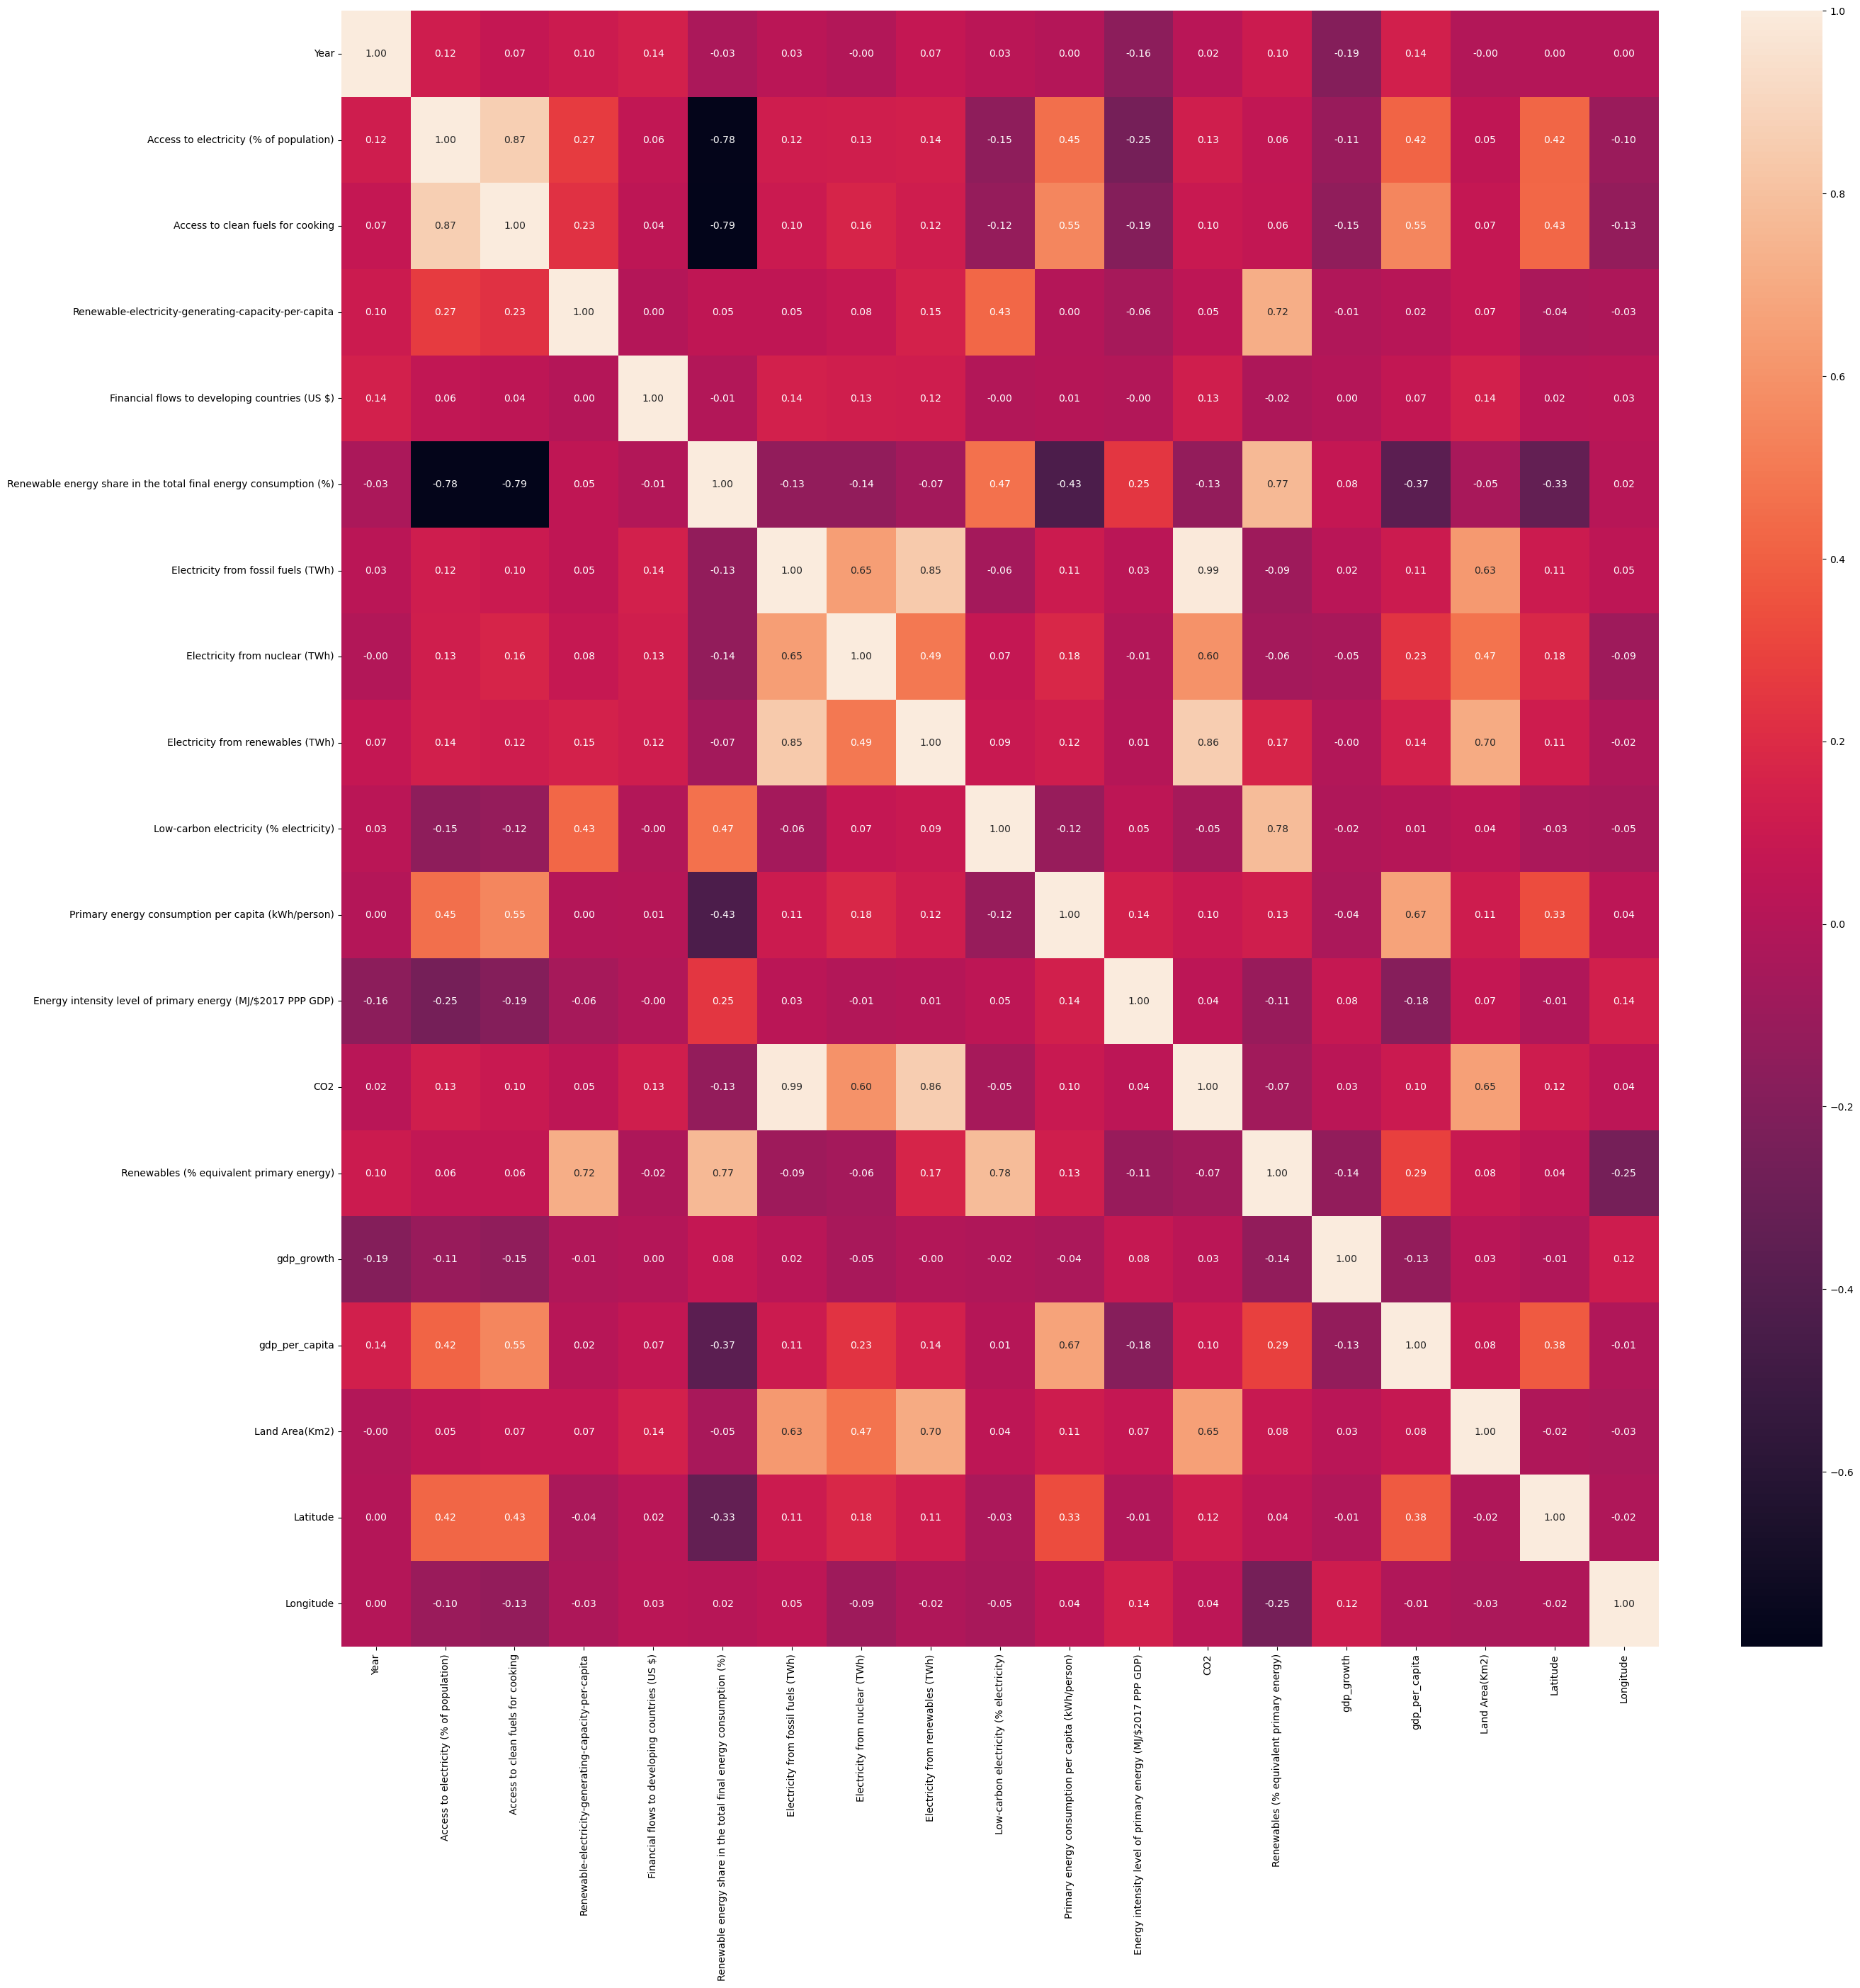

In [ ]:
plt.figure(figsize=(30,30))
Corr_Matrix=df.corr()
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
print('Top 5 Most Positively Correlated to the Target Variable')
Corr_Matrix['CO2'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the Target Variable


CO2                                    1.000000
Electricity from fossil fuels (TWh)    0.989741
Electricity from renewables (TWh)      0.856270
Land Area(Km2)                         0.653732
Electricity from nuclear (TWh)         0.598495
Name: CO2, dtype: float64

In [ ]:
print('Top 5 Most Negatively Correlated to the Target Variable')
Corr_Matrix['CO2'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to the Target Variable


Renewable energy share in the total final energy consumption (%)   -0.132715
Renewables (% equivalent primary energy)                           -0.073735
Low-carbon electricity (% electricity)                             -0.054515
Year                                                                0.024759
gdp_growth                                                          0.031523
Name: CO2, dtype: float64

In [ ]:
columns_to_drop = [col for col in Corr_Matrix.columns if abs(Corr_Matrix.loc['CO2', col]) < 0.5]
columns_to_drop
df = df.drop(columns_to_drop, axis=1)
df=df.dropna()

In [ ]:
df.rename(columns={'Density\\n(P/Km2)': 'New_Density'}, inplace=True)
df['New_Density'] = df['New_Density'].str.replace(',', '').astype(int)
df.rename(columns={'Land Area(Km2)': 'Land'}, inplace=True)
df

,Entity,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2,New_Density,Land
0,Afghanistan,0.16,0.00,0.31,7.600000e+02,60,652230.0
1,Afghanistan,0.09,0.00,0.50,7.300000e+02,60,652230.0
2,Afghanistan,0.13,0.00,0.56,1.030000e+03,60,652230.0
3,Afghanistan,0.31,0.00,0.63,1.220000e+03,60,652230.0
4,Afghanistan,0.33,0.00,0.56,1.030000e+03,60,652230.0
5,Afghanistan,0.34,0.00,0.59,1.550000e+03,60,652230.0
6,Afghanistan,0.20,0.00,0.64,1.760000e+03,60,652230.0
7,Afghanistan,0.20,0.00,0.75,1.770000e+03,60,652230.0
8,Afghanistan,0.19,0.00,0.54,3.560000e+03,60,652230.0
9,Afghanistan,0.16,0.00,0.78,4.880000e+03,60,652230.0


In [ ]:
le = LabelEncoder()
df.Entity = le.fit_transform(df.Entity)

In [ ]:
X = df.drop(columns=['CO2'])
y = df['CO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2480, 6)
X_test shape: (621, 6)
y_train shape: (2480,)
y_test shape: (621,)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual CO2'] = y_test
    submit['Predict_CO2'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.98
Mean Absolute Error (MAE): 29725.26
Root Mean Squared Error (RMSE): 94307.72
   index     Actual CO2   Predict_CO2
0    826   22879.999160  21418.874921
1   3458  174729.995700  66222.235723
2   3611    2109.999895   4740.572001
3   1872     409.999996  -3055.390651
4   1364     330.000013  -1718.878739
----------------------------------------
Random Forest:
R2 Score: 0.99
Mean Absolute Error (MAE): 8510.70
Root Mean Squared Error (RMSE): 55215.07
   index     Actual CO2    Predict_CO2
0    826   22879.999160   20265.100027
1   3458  174729.995700  181820.500943
2   3611    2109.999895    2050.399951
3   1872     409.999996     426.783337
4   1364     330.000013     332.254993
----------------------------------------
The best performing model is: RandomForestRegressor with accuracy: 0.99
